In [1]:
import moda
from moda import QEHCParameters, QEHCSolver
import sys
import faulthandler
faulthandler.enable()

params = QEHCParameters()
solver = QEHCSolver()
    
ds1 = moda.DataSet('linear_d8n400_7')
res = solver.Solve(ds1,params)
print(res)

(2.2388938702988526e-08, 0.0, 113, -1, 2599425)


In [2]:
import numpy as np
data = np.array([[2.0,3.0],[3.0,4.0]])

ds2 = moda.DataSet(data)

print(ds2)



2 3 
3 4 



Elsapsed: 35.92032217979431
0
0
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


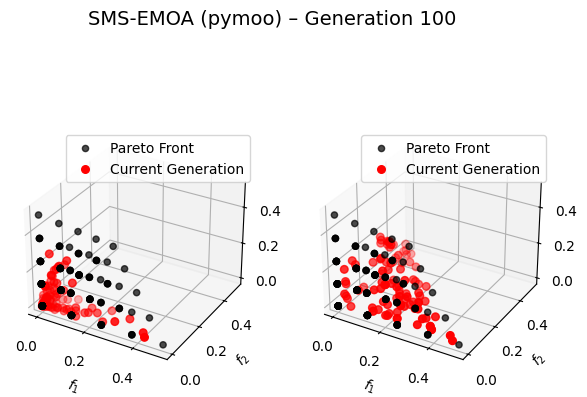

In [2]:
from pymoo.algorithms.moo.moda.sms_moda import SMSEMOA_MODA
from pymoo.algorithms.moo.sms import SMSEMOA
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from pymoo.util.reference_direction import UniformReferenceDirectionFactory
from pymoo.optimize import minimize
from pymoo.problems import get_problem
import time
# 1. Setup Problem and Run Optimization once
n_obj = 6
problem = get_problem("dtlz1",6,n_obj=n_obj)
algorithm = SMSEMOA()
pf = problem.pareto_front(ref_dirs = UniformReferenceDirectionFactory(n_obj, n_points=126  ).do())

start = time.time()
res = minimize(problem, algorithm, ('n_gen', 100), seed=1, save_history=True)
print(f'Elsapsed: {time.time() - start}')
# 2. Setup the Figure for Animation
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(pf[:, 0], pf[:, 1], pf[:, 2], color="black", alpha=0.7, label="Pareto Front")
ax2.scatter(pf[:, 3], pf[:, 4], pf[:, 5], color="black", alpha=0.7, label="Pareto Front")
scatter1 = ax1.scatter([], [], [], color="red", s=30, label="Current Generation")
scatter2 = ax2.scatter([], [], [], color="red", s=30, label="Current Generation")

title = fig.suptitle("SMS-EMOA (pymoo)", fontsize=14)
ax1.set_xlabel("$f_1$")
ax2.set_xlabel("$f_1$")
ax1.set_ylabel("$f_2$")
ax2.set_ylabel("$f_2$")
ax1.legend()
ax2.legend()

# 3. Define the Update Function
def update_13(frame):
    print(frame)
    # Get the population objectives at this generation
    F = res.history[frame].opt.get("F")
    scatter1._offsets3d = (F[:, 0], F[:, 1], F[:, 2])
    scatter2._offsets3d = (F[:, 3], F[:, 4], F[:, 5])
    title.set_text(f"SMS-EMOA (pymoo) – Generation {frame + 1}")
    return scatter1,scatter2



# 4. Create and Show Animation
# interval is delay between frames in milliseconds
ani = FuncAnimation(fig, update_13, frames=len(res.history), interval=50, blit=True)
ani.save('smsemoa.mp4')

plt.show()

128 / 100 127 / 100 126 / 100 125 / 100 124 / 100 123 / 100 122 / 100 121 / 100 120 / 100 119 / 100 118 / 100 117 / 100 116 / 100 115 / 100 114 / 100 113 / 100 112 / 100 111 / 100 110 / 100 109 / 100 108 / 100 107 / 100 106 / 100 105 / 100 104 / 100 103 / 100 102 / 100 101 / 100 101 / 100 146 / 100 145 / 100 144 / 100 143 / 100 142 / 100 141 / 100 140 / 100 139 / 100 138 / 100 137 / 100 136 / 100 135 / 100 134 / 100 133 / 100 132 / 100 131 / 100 130 / 100 129 / 100 128 / 100 127 / 100 126 / 100 125 / 100 124 / 100 123 / 100 122 / 100 121 / 100 120 / 100 119 / 100 118 / 100 117 / 100 116 / 100 115 / 100 114 / 100 113 / 100 112 / 100 111 / 100 110 / 100 109 / 100 108 / 100 107 / 100 106 / 100 105 / 100 104 / 100 103 / 100 102 / 100 101 / 100 111 / 100 110 / 100 109 / 100 108 / 100 107 / 100 106 / 100 105 / 100 104 / 100 103 / 100 102 / 100 101 / 100 131 / 100 130 / 100 129 / 100 128 / 100 127 / 100 126 / 100 125 / 100 124 / 100 123 / 100 122 / 100 121 / 100 120 / 100 119 / 100 118 / 100 

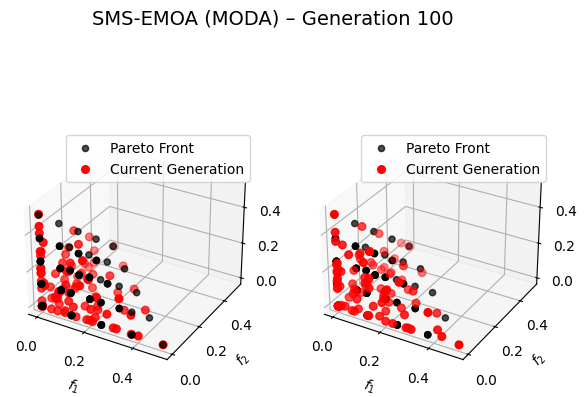

In [1]:
from pymoo.algorithms.moo.moda.sms_moda import SMSEMOA_MODA
from pymoo.algorithms.moo.sms import SMSEMOA
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from pymoo.util.reference_direction import UniformReferenceDirectionFactory
from pymoo.optimize import minimize
from pymoo.problems import get_problem
import time
# 1. Setup Problem and Run Optimization once
n_obj = 6
problem = get_problem("dtlz1",6,n_obj=n_obj)
algorithm = SMSEMOA_MODA()
pf = problem.pareto_front(ref_dirs = UniformReferenceDirectionFactory(n_obj, n_points=126  ).do())

start = time.time()
res = minimize(problem, algorithm, ('n_gen', 100), seed=1, save_history=True)
print(f'Elsapsed: {time.time() - start}')
# 2. Setup the Figure for Animation
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(pf[:, 0], pf[:, 1], pf[:, 2], color="black", alpha=0.7, label="Pareto Front")
ax2.scatter(pf[:, 3], pf[:, 4], pf[:, 5], color="black", alpha=0.7, label="Pareto Front")
scatter1 = ax1.scatter([], [], [], color="red", s=30, label="Current Generation")
scatter2 = ax2.scatter([], [], [], color="red", s=30, label="Current Generation")

title = fig.suptitle("SMS-EMOA (MODA)", fontsize=14)
ax1.set_xlabel("$f_1$")
ax2.set_xlabel("$f_1$")
ax1.set_ylabel("$f_2$")
ax2.set_ylabel("$f_2$")
ax1.legend()
ax2.legend()

# 3. Define the Update Function
def update_13(frame):
    print(frame)
    # Get the population objectives at this generation
    F = res.history[frame].opt.get("F")
    scatter1._offsets3d = (F[:, 0], F[:, 1], F[:, 2])
    scatter2._offsets3d = (F[:, 3], F[:, 4], F[:, 5])
    title.set_text(f"SMS-EMOA (MODA) – Generation {frame + 1}")
    return scatter1,scatter2



# 4. Create and Show Animation
# interval is delay between frames in milliseconds
ani = FuncAnimation(fig, update_13, frames=len(res.history), interval=50, blit=True)
ani.save('smsemoa_moda.mp4')

plt.show()

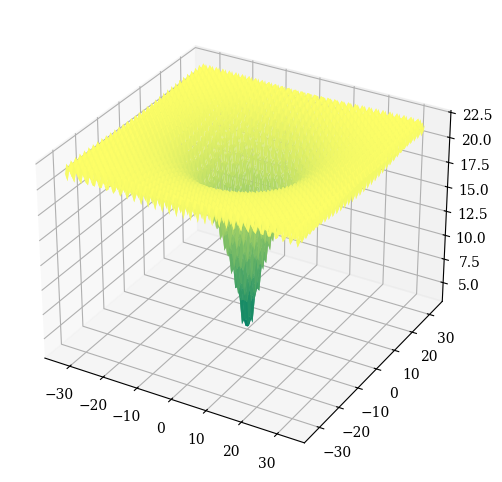

In [19]:
import numpy as np

from pymoo.problems import get_problem
from pymoo.visualization.fitness_landscape import FitnessLandscape

problem = get_problem("ackley", n_var=2, a=20, b=1/5, c=2 * np.pi)

FitnessLandscape(problem, angle=(45, 45), _type="surface").show()

In [ ]:
from pymoo.algorithms.moo.moda.sms_moda import SMSEMOA_MODA
from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.algorithms.moo.sms_exact import SMSEMOA_EXACT
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from pymoo.util.reference_direction import UniformReferenceDirectionFactory
from pymoo.optimize import minimize
from pymoo.problems import get_problem
import time
from pymoo.indicators.igd import IGD
from pymoo.util.normalization import normalize
import numpy as np


algos = ['wfg1','wfg2','dtlz1','dtlz2','dtlz4']
no_obs = [10,10,4,4,4]
for i,algo in enumerate(algos):
    for j in range(10):
        n_obj = 4
        problem = get_problem(algo,no_obs[i],n_obj=n_obj)
        pf = problem.pareto_front(ref_dirs = UniformReferenceDirectionFactory(n_obj, n_points=120    ).do())
        algorithm = SMSEMOA_MODA()
        start = time.time()
        res_moda = minimize(problem, algorithm, ('n_gen', 25), seed=j, save_history=True)
        moda_time = time.time() - start
        algorithm = SMSEMOA()
        start = time.time()
        res_approx_moo = minimize(problem, algorithm, ('n_gen', 25), seed=j, save_history=True)
        moo_time = time.time() - start
        algorithm = SMSEMOA_EXACT()
        start = time.time()
        res_exact_moo = minimize(problem, algorithm, ('n_gen', 25), seed=j, save_history=True)
        moo_exact_time = time.time() - start
        
        
        F_all = np.vstack([
            res_moda.F,
            res_approx_moo.F,
            res_exact_moo.F,
            pf
        ])

        F_norm = normalize(F_all)

        n1 = len(res_moda.F)
        n2 = len(res_approx_moo.F)
        n3 = len(res_exact_moo.F)

        F_moda_n = F_norm[:n1]
        F_approx_n = F_norm[n1:n1+n2]
        F_exact_n = F_norm[n1+n2:n1+n2+n3]
        pf_n = F_norm[n1+n2+n3:]

        igd = IGD(pf_n)
        igd_moda = igd(F_moda_n)
        igd_approx = igd(F_approx_n)
        igd_exact = igd(F_exact_n)
        print(f'{moo_exact_time}\t{igd_exact}\t{moo_time}\t{igd_approx}\t{moda_time}\t{igd_moda}\r\n',end = '')

0.39861083030700684	0.7076300610819387	1.7601964473724365	0.70143469362553	10.626396417617798	0.6781927794547881
0.3916745185852051	0.7207131421638279	1.820204257965088	0.7153797720672903	10.042178869247437	0.6992149262164435
0.44353461265563965	0.7164912495837612	1.6378891468048096	0.658795804523344	11.462257862091064	0.69804079287732
0.4378323554992676	0.656614317796788	1.341292381286621	0.7170092982704112	7.64225172996521	0.705123868431027
0.3731982707977295	0.6930533683071407	1.306410312652588	0.7089943200236456	10.284153938293457	0.6860528215706228
0.4617455005645752	0.7062408881825493	1.669541358947754	0.6757970160307598	9.80328631401062	0.7022181931096604
0.3694112300872803	0.6911844624583732	1.4733340740203857	0.6844835788409658	9.449986934661865	0.6819557166303073
0.3806266784667969	0.6784524127190347	1.6654374599456787	0.6825838312258632	11.562350988388062	0.6942506435658
0.31588315963745117	0.6910481943711978	1.2047324180603027	0.7098356312066171	12.607048511505127	0.7162170